## Importing libraries and modules

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime as dt
%matplotlib inline 
#tell jupyter to show the plot in output cell only

## Fetching data from data source

In [2]:
df = pd.read_csv("YourCabs.csv")

In [3]:
df

,id,user_id,vehicle_model_id,travel_type_id,package_id,from_area_id,to_area_id,from_city_id,to_city_id,from_date,online_booking,mobile_site_booking,booking_created,from_lat,from_long,to_lat,to_long,Car_Cancellation
0,132512,22177,28,2,NaN,83.0,448.0,NaN,NaN,01-01-2013 02:00,0,0,01-01-2013 01:39,12.924150,77.672290,12.927320,77.635750,0
1,132513,21413,12,2,NaN,1010.0,540.0,NaN,NaN,01-01-2013 09:00,0,0,01-01-2013 02:25,12.966910,77.749350,12.927680,77.626640,0
2,132514,22178,12,2,NaN,1301.0,1034.0,NaN,NaN,01-01-2013 03:30,0,0,01-01-2013 03:08,12.937222,77.626915,13.047926,77.597766,0
3,132515,13034,12,2,NaN,768.0,398.0,NaN,NaN,01-01-2013 05:45,0,0,01-01-2013 04:39,12.989990,77.553320,12.971430,77.639140,0
4,132517,22180,12,2,NaN,1365.0,849.0,NaN,NaN,01-01-2013 09:00,0,0,01-01-2013 07:53,12.845653,77.677925,12.954340,77.600720,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43426,185937,14364,12,2,NaN,1147.0,452.0,15.0,NaN,11/24/2013 18:00,1,0,11/24/2013 14:25,13.030640,77.649100,12.952780,77.590880,0
43427,185938,48727,12,2,NaN,393.0,466.0,15.0,NaN,11/26/2013 1:00,1,0,11/24/2013 14:30,13.199560,77.706880,13.017436,77.644580,0
43428,185939,48729,12,3,1.0,974.0,NaN,15.0,NaN,11/24/2013 18:30,0,0,11/24/2013 14:35,13.075570,77.559040,NaN,NaN,0
43429,185940,30724,87,2,NaN,1263.0,542.0,15.0,NaN,11/24/2013 16:00,0,0,11/24/2013 14:43,12.968970,77.594560,12.938230,77.622890,0


Field descriptions:
- id - booking ID
- user_id - the ID of the customer (based on mobile number)
- vehicle_model_id - vehicle model type.
- package_id - type of package
  - (1=4hrs & 40kms, 2=8hrs & 80kms, 3=6hrs & 60kms, 4= 10hrs & 100kms, 5=5hrs & 50kms, 6=3hrs & 30kms, 7=12hrs & 120kms)
- travel_type_id - type of travel (1=long distance, 2= point to point, 3= hourly rental).
- from_area_id - unique identifier of area. Applicable only for point-to-point travel and packages
- to_area_id - unique identifier of area. Applicable only for point-to-point travel
- from_city_id - unique identifier of city
- to_city_id - unique identifier of city (only for intercity)
- from_date - time stamp of requested trip start
- online_booking - if booking was done on desktop website
- mobile_site_booking - if booking was done on mobile website
- booking_created - time stamp of booking
- from_lat - latitude of from area
- from_long - longitude of from area
- to_lat - latitude of to area
- to_long - longitude of to area
- Car_Cancellation - whether the booking was cancelled (1) or not (0) due to unavailability of a car.

# Data cleaning and preprocessing

## Checking Column names

In [4]:
df.columns

Index(['id', 'user_id', 'vehicle_model_id', 'travel_type_id', 'package_id',
       'from_area_id', 'to_area_id', 'from_city_id', 'to_city_id', 'from_date',
       'online_booking', 'mobile_site_booking', 'booking_created', 'from_lat',
       'from_long', 'to_lat', 'to_long', 'Car_Cancellation'],
      dtype='object')

## Dropping first 2 columns
    ID(Unique) and User_id(Personal info-PII)

In [5]:
df = df.drop(['id','user_id'],axis=1)
df.head()

,vehicle_model_id,travel_type_id,package_id,from_area_id,to_area_id,from_city_id,to_city_id,from_date,online_booking,mobile_site_booking,booking_created,from_lat,from_long,to_lat,to_long,Car_Cancellation
0,28,2,NaN,83.0,448.0,NaN,NaN,01-01-2013 02:00,0,0,01-01-2013 01:39,12.924150,77.672290,12.927320,77.635750,0
1,12,2,NaN,1010.0,540.0,NaN,NaN,01-01-2013 09:00,0,0,01-01-2013 02:25,12.966910,77.749350,12.927680,77.626640,0
2,12,2,NaN,1301.0,1034.0,NaN,NaN,01-01-2013 03:30,0,0,01-01-2013 03:08,12.937222,77.626915,13.047926,77.597766,0
3,12,2,NaN,768.0,398.0,NaN,NaN,01-01-2013 05:45,0,0,01-01-2013 04:39,12.989990,77.553320,12.971430,77.639140,0
4,12,2,NaN,1365.0,849.0,NaN,NaN,01-01-2013 09:00,0,0,01-01-2013 07:53,12.845653,77.677925,12.954340,77.600720,0


## Creating a new column Is_VMID_12- Is Vehicle Model Id 12 

In [6]:
df.vehicle_model_id.value_counts() #more no. of vehicle model id with 12

vehicle_model_id
12    31859
85     2407
89     2391
65     1912
28     1702
24     1494
87      565
90      312
23      297
86      123
10      104
64       85
54       73
17       40
91       25
30       14
36        9
13        7
72        2
1         2
43        2
14        1
69        1
76        1
75        1
70        1
39        1
Name: count, dtype: int64

In [7]:
df['Is_VMID_12'] = pd.get_dummies(df['vehicle_model_id'])[[12]].astype(int).astype(object)
df = df.drop(['vehicle_model_id'],axis=1)
df.head()

,travel_type_id,package_id,from_area_id,to_area_id,from_city_id,to_city_id,from_date,online_booking,mobile_site_booking,booking_created,from_lat,from_long,to_lat,to_long,Car_Cancellation,Is_VMID_12
0,2,NaN,83.0,448.0,NaN,NaN,01-01-2013 02:00,0,0,01-01-2013 01:39,12.924150,77.672290,12.927320,77.635750,0,0
1,2,NaN,1010.0,540.0,NaN,NaN,01-01-2013 09:00,0,0,01-01-2013 02:25,12.966910,77.749350,12.927680,77.626640,0,1
2,2,NaN,1301.0,1034.0,NaN,NaN,01-01-2013 03:30,0,0,01-01-2013 03:08,12.937222,77.626915,13.047926,77.597766,0,1
3,2,NaN,768.0,398.0,NaN,NaN,01-01-2013 05:45,0,0,01-01-2013 04:39,12.989990,77.553320,12.971430,77.639140,0,1
4,2,NaN,1365.0,849.0,NaN,NaN,01-01-2013 09:00,0,0,01-01-2013 07:53,12.845653,77.677925,12.954340,77.600720,0,1


## Dividing travel_type_id into 3 dataframes

There will be package_id only for travel_type_id=3 , rest it will be NaN

In [8]:
df.travel_type_id.unique()

array([2, 1, 3], dtype=int64)

In [9]:
df_ttid_1 = df.loc[df.travel_type_id==1]
df_ttid_1.head()

,travel_type_id,package_id,from_area_id,to_area_id,from_city_id,to_city_id,from_date,online_booking,mobile_site_booking,booking_created,from_lat,from_long,to_lat,to_long,Car_Cancellation,Is_VMID_12
6,1,NaN,571.0,NaN,15.0,108.0,01-01-2013 09:45,0,0,01-01-2013 09:21,12.951850,77.696420,NaN,NaN,0,1
17,1,NaN,1383.0,NaN,NaN,32.0,01-12-2013 08:00,1,0,01-01-2013 12:17,12.930451,77.685822,NaN,NaN,0,0
24,1,NaN,515.0,NaN,15.0,32.0,01-05-2013 08:30,0,0,01-01-2013 14:40,12.978960,77.673450,NaN,NaN,0,0
158,1,NaN,136.0,NaN,1.0,152.0,01-04-2013 09:30,1,0,01-03-2013 12:19,12.907960,77.624180,NaN,NaN,0,0
216,1,NaN,1118.0,NaN,NaN,32.0,01-06-2013 07:30,1,0,01-04-2013 09:32,12.930220,77.560390,NaN,NaN,0,0


In [10]:
df_ttid_2 = df.loc[df.travel_type_id==2]
df_ttid_2.head()

,travel_type_id,package_id,from_area_id,to_area_id,from_city_id,to_city_id,from_date,online_booking,mobile_site_booking,booking_created,from_lat,from_long,to_lat,to_long,Car_Cancellation,Is_VMID_12
0,2,NaN,83.0,448.0,NaN,NaN,01-01-2013 02:00,0,0,01-01-2013 01:39,12.924150,77.672290,12.927320,77.635750,0,0
1,2,NaN,1010.0,540.0,NaN,NaN,01-01-2013 09:00,0,0,01-01-2013 02:25,12.966910,77.749350,12.927680,77.626640,0,1
2,2,NaN,1301.0,1034.0,NaN,NaN,01-01-2013 03:30,0,0,01-01-2013 03:08,12.937222,77.626915,13.047926,77.597766,0,1
3,2,NaN,768.0,398.0,NaN,NaN,01-01-2013 05:45,0,0,01-01-2013 04:39,12.989990,77.553320,12.971430,77.639140,0,1
4,2,NaN,1365.0,849.0,NaN,NaN,01-01-2013 09:00,0,0,01-01-2013 07:53,12.845653,77.677925,12.954340,77.600720,0,1


In [11]:
df_ttid_3 = df.loc[df.travel_type_id==3]
df_ttid_3.head()

,travel_type_id,package_id,from_area_id,to_area_id,from_city_id,to_city_id,from_date,online_booking,mobile_site_booking,booking_created,from_lat,from_long,to_lat,to_long,Car_Cancellation,Is_VMID_12
8,3,2.0,448.0,NaN,NaN,NaN,01-01-2013 16:00,0,0,01-01-2013 09:44,12.927320,77.635750,NaN,NaN,0,0
20,3,2.0,471.0,NaN,NaN,NaN,01-01-2013 14:30,0,0,01-01-2013 12:52,13.018540,77.635240,NaN,NaN,0,0
23,3,1.0,1286.0,NaN,NaN,NaN,01-01-2013 16:30,0,0,01-01-2013 14:39,12.973448,77.620320,NaN,NaN,0,1
34,3,1.0,1323.0,NaN,NaN,NaN,01-01-2013 20:00,1,0,01-01-2013 17:25,12.869805,77.653211,NaN,NaN,0,1
47,3,2.0,142.0,NaN,NaN,NaN,01-02-2013 03:00,0,0,01-01-2013 19:37,12.912810,77.609230,NaN,NaN,0,1


### Pre-processing df_ttid_1

In [12]:
df_ttid_1.head() #package_id=nan
#geopy - to calculate distance using GPS coordinates

,travel_type_id,package_id,from_area_id,to_area_id,from_city_id,to_city_id,from_date,online_booking,mobile_site_booking,booking_created,from_lat,from_long,to_lat,to_long,Car_Cancellation,Is_VMID_12
6,1,NaN,571.0,NaN,15.0,108.0,01-01-2013 09:45,0,0,01-01-2013 09:21,12.951850,77.696420,NaN,NaN,0,1
17,1,NaN,1383.0,NaN,NaN,32.0,01-12-2013 08:00,1,0,01-01-2013 12:17,12.930451,77.685822,NaN,NaN,0,0
24,1,NaN,515.0,NaN,15.0,32.0,01-05-2013 08:30,0,0,01-01-2013 14:40,12.978960,77.673450,NaN,NaN,0,0
158,1,NaN,136.0,NaN,1.0,152.0,01-04-2013 09:30,1,0,01-03-2013 12:19,12.907960,77.624180,NaN,NaN,0,0
216,1,NaN,1118.0,NaN,NaN,32.0,01-06-2013 07:30,1,0,01-04-2013 09:32,12.930220,77.560390,NaN,NaN,0,0


In [13]:
df_ttid_1.shape

(1589, 16)

In [14]:
df_ttid_1.isnull().sum()

travel_type_id            0
package_id             1589
from_area_id             88
to_area_id             1588
from_city_id            196
to_city_id                1
from_date                 0
online_booking            0
mobile_site_booking       0
booking_created           0
from_lat                 93
from_long                93
to_lat                 1588
to_long                1588
Car_Cancellation          0
Is_VMID_12                0
dtype: int64

In [15]:
df_ttid_1=df_ttid_1.drop(['travel_type_id','package_id','to_area_id','from_lat','from_long','to_lat','to_long'],axis=1)
df_ttid_1.head()

,from_area_id,from_city_id,to_city_id,from_date,online_booking,mobile_site_booking,booking_created,Car_Cancellation,Is_VMID_12
6,571.0,15.0,108.0,01-01-2013 09:45,0,0,01-01-2013 09:21,0,1
17,1383.0,NaN,32.0,01-12-2013 08:00,1,0,01-01-2013 12:17,0,0
24,515.0,15.0,32.0,01-05-2013 08:30,0,0,01-01-2013 14:40,0,0
158,136.0,1.0,152.0,01-04-2013 09:30,1,0,01-03-2013 12:19,0,0
216,1118.0,NaN,32.0,01-06-2013 07:30,1,0,01-04-2013 09:32,0,0


In [16]:
df_ttid_1.isnull().sum()

from_area_id            88
from_city_id           196
to_city_id               1
from_date                0
online_booking           0
mobile_site_booking      0
booking_created          0
Car_Cancellation         0
Is_VMID_12               0
dtype: int64

In [17]:
df_ttid_1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1589 entries, 6 to 43407
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   from_area_id         1501 non-null   float64
 1   from_city_id         1393 non-null   float64
 2   to_city_id           1588 non-null   float64
 3   from_date            1589 non-null   object 
 4   online_booking       1589 non-null   int64  
 5   mobile_site_booking  1589 non-null   int64  
 6   booking_created      1589 non-null   object 
 7   Car_Cancellation     1589 non-null   int64  
 8   Is_VMID_12           1589 non-null   object 
dtypes: float64(3), int64(3), object(3)
memory usage: 124.1+ KB


In [18]:
df_ttid_1 = df_ttid_1.astype({'from_area_id':'object','from_city_id':'object','to_city_id':'object'})
df_ttid_1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1589 entries, 6 to 43407
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   from_area_id         1501 non-null   object
 1   from_city_id         1393 non-null   object
 2   to_city_id           1588 non-null   object
 3   from_date            1589 non-null   object
 4   online_booking       1589 non-null   int64 
 5   mobile_site_booking  1589 non-null   int64 
 6   booking_created      1589 non-null   object
 7   Car_Cancellation     1589 non-null   int64 
 8   Is_VMID_12           1589 non-null   object
dtypes: int64(3), object(6)
memory usage: 124.1+ KB


In [19]:
df_ttid_1.describe(include=['object']) #top = mode

,from_area_id,from_city_id,to_city_id,from_date,booking_created,Is_VMID_12
count,1501.0,1393.0,1588.0,1589,1589,1589
unique,297.0,3.0,116.0,1288,1586,2
top,393.0,15.0,32.0,10-12-2013 06:00,4/26/2013 22:14,0
freq,257.0,1281.0,475.0,14,2,855


In [20]:
#filled Null entries with mode 
df_ttid_1['from_area_id']= df_ttid_1.from_area_id.fillna(393)
df_ttid_1['from_city_id']= df_ttid_1.from_city_id.fillna(15)
df_ttid_1['to_city_id']= df_ttid_1.to_city_id.fillna(32)
df_ttid_1.isnull().sum() 

from_area_id           0
from_city_id           0
to_city_id             0
from_date              0
online_booking         0
mobile_site_booking    0
booking_created        0
Car_Cancellation       0
Is_VMID_12             0
dtype: int64

## Create cols with H,M,L,Z cancellations 

In [21]:
from_area_id_cancellation_perc = df_ttid_1[['from_area_id','Car_Cancellation']].groupby('from_area_id').mean()['Car_Cancellation']
from_area_id_cancellation_perc.head(20)

from_area_id
2.0      0.000000
24.0     0.000000
25.0     0.000000
49.0     0.000000
58.0     0.000000
61.0     0.166667
62.0     0.500000
83.0     0.034483
85.0     0.000000
87.0     0.000000
89.0     0.000000
92.0     0.000000
105.0    0.000000
112.0    0.000000
115.0    0.000000
117.0    0.000000
118.0    0.000000
119.0    0.000000
120.0    0.000000
122.0    0.000000
Name: Car_Cancellation, dtype: float64

In [22]:
df_ttid_1['from_area_id_cancellation_perc'] = df_ttid_1['from_area_id'].map(from_area_id_cancellation_perc)
df_ttid_1.head()

,from_area_id,from_city_id,to_city_id,from_date,online_booking,mobile_site_booking,booking_created,Car_Cancellation,Is_VMID_12,from_area_id_cancellation_perc
6,571.0,15.0,108.0,01-01-2013 09:45,0,0,01-01-2013 09:21,0,1,0.020408
17,1383.0,15.0,32.0,01-12-2013 08:00,1,0,01-01-2013 12:17,0,0,0.000000
24,515.0,15.0,32.0,01-05-2013 08:30,0,0,01-01-2013 14:40,0,0,0.000000
158,136.0,1.0,152.0,01-04-2013 09:30,1,0,01-03-2013 12:19,0,0,0.000000
216,1118.0,15.0,32.0,01-06-2013 07:30,1,0,01-04-2013 09:32,0,0,0.000000


In [23]:
df_ttid_1.loc[df_ttid_1.from_area_id==571]

,from_area_id,from_city_id,to_city_id,from_date,online_booking,mobile_site_booking,booking_created,Car_Cancellation,Is_VMID_12,from_area_id_cancellation_perc
6,571.0,15.0,108.0,01-01-2013 09:45,0,0,01-01-2013 09:21,0,1,0.020408
1407,571.0,15.0,178.0,1/19/2013 6:30,0,0,1/17/2013 13:25,0,0,0.020408
2413,571.0,15.0,108.0,1/27/2013 7:30,1,0,1/26/2013 18:05,0,0,0.020408
2440,571.0,15.0,185.0,1/27/2013 8:30,0,0,1/26/2013 21:21,0,1,0.020408
2839,571.0,1.0,131.0,1/31/2013 6:00,1,0,1/30/2013 20:24,0,1,0.020408
...,...,...,...,...,...,...,...,...,...,...
42222,571.0,15.0,44.0,11/14/2013 5:00,0,0,11/13/2013 21:19,0,1,0.020408
42584,571.0,15.0,108.0,11/17/2013 5:00,1,0,11/16/2013 18:47,0,0,0.020408
42948,571.0,15.0,32.0,11/23/2013 6:00,1,0,11/20/2013 15:07,0,1,0.020408
43222,571.0,15.0,24.0,11/23/2013 10:30,0,0,11/22/2013 18:59,0,1,0.020408


### Creating city route using the two cols from_city_id and to_city_id

In [24]:
df_ttid_1['city_route'] = df_ttid_1['from_city_id'].astype('int').astype('str')+'->'+ df_ttid_1['to_city_id'].astype('int').astype('str')
df_ttid_1.head()

,from_area_id,from_city_id,to_city_id,from_date,online_booking,mobile_site_booking,booking_created,Car_Cancellation,Is_VMID_12,from_area_id_cancellation_perc,city_route
6,571.0,15.0,108.0,01-01-2013 09:45,0,0,01-01-2013 09:21,0,1,0.020408,15->108
17,1383.0,15.0,32.0,01-12-2013 08:00,1,0,01-01-2013 12:17,0,0,0.000000,15->32
24,515.0,15.0,32.0,01-05-2013 08:30,0,0,01-01-2013 14:40,0,0,0.000000,15->32
158,136.0,1.0,152.0,01-04-2013 09:30,1,0,01-03-2013 12:19,0,0,0.000000,1->152
216,1118.0,15.0,32.0,01-06-2013 07:30,1,0,01-04-2013 09:32,0,0,0.000000,15->32


In [25]:
city_route_cancellation_perc = df_ttid_1[['city_route','Car_Cancellation']].groupby('city_route').mean()['Car_Cancellation']
df_ttid_1['city_route_cancellation_perc'] = df_ttid_1['city_route'].map(city_route_cancellation_perc)
df_ttid_1.head()

,from_area_id,from_city_id,to_city_id,from_date,online_booking,mobile_site_booking,booking_created,Car_Cancellation,Is_VMID_12,from_area_id_cancellation_perc,city_route,city_route_cancellation_perc
6,571.0,15.0,108.0,01-01-2013 09:45,0,0,01-01-2013 09:21,0,1,0.020408,15->108,0.016129
17,1383.0,15.0,32.0,01-12-2013 08:00,1,0,01-01-2013 12:17,0,0,0.000000,15->32,0.017937
24,515.0,15.0,32.0,01-05-2013 08:30,0,0,01-01-2013 14:40,0,0,0.000000,15->32,0.017937
158,136.0,1.0,152.0,01-04-2013 09:30,1,0,01-03-2013 12:19,0,0,0.000000,1->152,0.000000
216,1118.0,15.0,32.0,01-06-2013 07:30,1,0,01-04-2013 09:32,0,0,0.000000,15->32,0.017937


In [26]:
conditions = [(df_ttid_1['from_area_id_cancellation_perc'] >= 0.67),
    (df_ttid_1['from_area_id_cancellation_perc'] == 0),
    ((df_ttid_1['from_area_id_cancellation_perc'] < 0.67) & (df_ttid_1['from_area_id_cancellation_perc'] >= 0.33)),
              (df_ttid_1['from_area_id_cancellation_perc'] < 0.33)]
choices = ['High', 'Zero', 'Medium','Low']
df_ttid_1['from_area_id_cancellation'] = np.select(conditions,choices)
df_ttid_1.head()
# df_ttid_1['from_area_id_cancellation']=np.where(df_ttid_1['from_area_id_cancellation_perc']>=0.67,'High',
# np.where(df_ttid_1['from_area_id_cancellation_perc']<0.33,'Low','Medium'))
# df_ttid_1['from_area_id_cancellation'].loc[df_ttid_1['from_area_id_cancellation_perc']==0] = 'Zero'
# df_ttid_1.head()

,from_area_id,from_city_id,to_city_id,from_date,online_booking,mobile_site_booking,booking_created,Car_Cancellation,Is_VMID_12,from_area_id_cancellation_perc,city_route,city_route_cancellation_perc,from_area_id_cancellation
6,571.0,15.0,108.0,01-01-2013 09:45,0,0,01-01-2013 09:21,0,1,0.020408,15->108,0.016129,Low
17,1383.0,15.0,32.0,01-12-2013 08:00,1,0,01-01-2013 12:17,0,0,0.000000,15->32,0.017937,Zero
24,515.0,15.0,32.0,01-05-2013 08:30,0,0,01-01-2013 14:40,0,0,0.000000,15->32,0.017937,Zero
158,136.0,1.0,152.0,01-04-2013 09:30,1,0,01-03-2013 12:19,0,0,0.000000,1->152,0.000000,Zero
216,1118.0,15.0,32.0,01-06-2013 07:30,1,0,01-04-2013 09:32,0,0,0.000000,15->32,0.017937,Zero


In [27]:
conditions = [(df_ttid_1['city_route_cancellation_perc'] >= 0.67),
    (df_ttid_1['city_route_cancellation_perc'] == 0),
    ((df_ttid_1['city_route_cancellation_perc'] < 0.67) & (df_ttid_1['city_route_cancellation_perc'] >= 0.33)),
              (df_ttid_1['city_route_cancellation_perc'] < 0.33)]
choices = ['High', 'Zero', 'Medium','Low']
df_ttid_1['city_route_cancellation'] = np.select(conditions,choices)
df_ttid_1.head()
# df_ttid_1['city_route_cancellation']=np.where(df_ttid_1['city_route_cancellation_perc']>=0.67,'High',
# np.where(df_ttid_1['from_area_id_cancellation_perc']<0.33,'Low','Medium'))
# df_ttid_1['city_route_cancellation'].loc[df_ttid_1['city_route_cancellation_perc']==0] = 'Zero'
# df_ttid_1.head()

,from_area_id,from_city_id,to_city_id,from_date,online_booking,mobile_site_booking,booking_created,Car_Cancellation,Is_VMID_12,from_area_id_cancellation_perc,city_route,city_route_cancellation_perc,from_area_id_cancellation,city_route_cancellation
6,571.0,15.0,108.0,01-01-2013 09:45,0,0,01-01-2013 09:21,0,1,0.020408,15->108,0.016129,Low,Low
17,1383.0,15.0,32.0,01-12-2013 08:00,1,0,01-01-2013 12:17,0,0,0.000000,15->32,0.017937,Zero,Low
24,515.0,15.0,32.0,01-05-2013 08:30,0,0,01-01-2013 14:40,0,0,0.000000,15->32,0.017937,Zero,Low
158,136.0,1.0,152.0,01-04-2013 09:30,1,0,01-03-2013 12:19,0,0,0.000000,1->152,0.000000,Zero,Zero
216,1118.0,15.0,32.0,01-06-2013 07:30,1,0,01-04-2013 09:32,0,0,0.000000,15->32,0.017937,Zero,Low


In [28]:
df_ttid_1[['from_area_id','from_area_id_cancellation_perc','from_area_id_cancellation','from_city_id','to_city_id','city_route','city_route_cancellation_perc','city_route_cancellation']]

,from_area_id,from_area_id_cancellation_perc,from_area_id_cancellation,from_city_id,to_city_id,city_route,city_route_cancellation_perc,city_route_cancellation
6,571.0,0.020408,Low,15.0,108.0,15->108,0.016129,Low
17,1383.0,0.000000,Zero,15.0,32.0,15->32,0.017937,Low
24,515.0,0.000000,Zero,15.0,32.0,15->32,0.017937,Low
158,136.0,0.000000,Zero,1.0,152.0,1->152,0.000000,Zero
216,1118.0,0.000000,Zero,15.0,32.0,15->32,0.017937,Low
...,...,...,...,...,...,...,...,...
43342,393.0,0.008696,Low,15.0,191.0,15->191,0.083333,Low
43385,119.0,0.000000,Zero,15.0,146.0,15->146,0.012048,Low
43386,1281.0,0.000000,Zero,15.0,32.0,15->32,0.017937,Low
43393,393.0,0.008696,Low,15.0,116.0,15->116,0.000000,Zero


### Dropping the cols used

In [29]:
df_ttid_1 = df_ttid_1.drop(['from_area_id','from_area_id_cancellation_perc','from_city_id','to_city_id','city_route','city_route_cancellation_perc'],axis=1)
df_ttid_1.head()

,from_date,online_booking,mobile_site_booking,booking_created,Car_Cancellation,Is_VMID_12,from_area_id_cancellation,city_route_cancellation
6,01-01-2013 09:45,0,0,01-01-2013 09:21,0,1,Low,Low
17,01-12-2013 08:00,1,0,01-01-2013 12:17,0,0,Zero,Low
24,01-05-2013 08:30,0,0,01-01-2013 14:40,0,0,Zero,Low
158,01-04-2013 09:30,1,0,01-03-2013 12:19,0,0,Zero,Zero
216,01-06-2013 07:30,1,0,01-04-2013 09:32,0,0,Zero,Low


## Changing datetime

In [30]:
df_ttid_1.from_date = pd.to_datetime(df_ttid_1.from_date,format='mixed')
df_ttid_1.booking_created = pd.to_datetime(df_ttid_1.booking_created,format='mixed')

In [31]:
df_ttid_1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1589 entries, 6 to 43407
Data columns (total 8 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   from_date                  1589 non-null   datetime64[ns]
 1   online_booking             1589 non-null   int64         
 2   mobile_site_booking        1589 non-null   int64         
 3   booking_created            1589 non-null   datetime64[ns]
 4   Car_Cancellation           1589 non-null   int64         
 5   Is_VMID_12                 1589 non-null   object        
 6   from_area_id_cancellation  1589 non-null   object        
 7   city_route_cancellation    1589 non-null   object        
dtypes: datetime64[ns](2), int64(3), object(3)
memory usage: 111.7+ KB


In [32]:
df_ttid_1['month'] = df_ttid_1.from_date.dt.month #Month of booking
df_ttid_1.head()

,from_date,online_booking,mobile_site_booking,booking_created,Car_Cancellation,Is_VMID_12,from_area_id_cancellation,city_route_cancellation,month
6,2013-01-01 09:45:00,0,0,2013-01-01 09:21:00,0,1,Low,Low,1
17,2013-01-12 08:00:00,1,0,2013-01-01 12:17:00,0,0,Zero,Low,1
24,2013-01-05 08:30:00,0,0,2013-01-01 14:40:00,0,0,Zero,Low,1
158,2013-01-04 09:30:00,1,0,2013-01-03 12:19:00,0,0,Zero,Zero,1
216,2013-01-06 07:30:00,1,0,2013-01-04 09:32:00,0,0,Zero,Low,1


In [33]:
df_ttid_1['day_of_week'] = df_ttid_1.from_date.dt.dayofweek #Day of week of booking
df_ttid_1.head()
#Monday = 0 , Sunday = 6

,from_date,online_booking,mobile_site_booking,booking_created,Car_Cancellation,Is_VMID_12,from_area_id_cancellation,city_route_cancellation,month,day_of_week
6,2013-01-01 09:45:00,0,0,2013-01-01 09:21:00,0,1,Low,Low,1,1
17,2013-01-12 08:00:00,1,0,2013-01-01 12:17:00,0,0,Zero,Low,1,5
24,2013-01-05 08:30:00,0,0,2013-01-01 14:40:00,0,0,Zero,Low,1,5
158,2013-01-04 09:30:00,1,0,2013-01-03 12:19:00,0,0,Zero,Zero,1,4
216,2013-01-06 07:30:00,1,0,2013-01-04 09:32:00,0,0,Zero,Low,1,6


### Created weekend col

In [34]:
df_ttid_1['is_weekend']=(df_ttid_1.from_date.dt.weekday>=5).astype('int')
df_ttid_1.head()

,from_date,online_booking,mobile_site_booking,booking_created,Car_Cancellation,Is_VMID_12,from_area_id_cancellation,city_route_cancellation,month,day_of_week,is_weekend
6,2013-01-01 09:45:00,0,0,2013-01-01 09:21:00,0,1,Low,Low,1,1,0
17,2013-01-12 08:00:00,1,0,2013-01-01 12:17:00,0,0,Zero,Low,1,5,1
24,2013-01-05 08:30:00,0,0,2013-01-01 14:40:00,0,0,Zero,Low,1,5,1
158,2013-01-04 09:30:00,1,0,2013-01-03 12:19:00,0,0,Zero,Zero,1,4,0
216,2013-01-06 07:30:00,1,0,2013-01-04 09:32:00,0,0,Zero,Low,1,6,1


In [35]:
df_ttid_1['hour_of_day']=df_ttid_1.from_date.dt.hour
df_ttid_1.head()

,from_date,online_booking,mobile_site_booking,booking_created,Car_Cancellation,Is_VMID_12,from_area_id_cancellation,city_route_cancellation,month,day_of_week,is_weekend,hour_of_day
6,2013-01-01 09:45:00,0,0,2013-01-01 09:21:00,0,1,Low,Low,1,1,0,9
17,2013-01-12 08:00:00,1,0,2013-01-01 12:17:00,0,0,Zero,Low,1,5,1,8
24,2013-01-05 08:30:00,0,0,2013-01-01 14:40:00,0,0,Zero,Low,1,5,1,8
158,2013-01-04 09:30:00,1,0,2013-01-03 12:19:00,0,0,Zero,Zero,1,4,0,9
216,2013-01-06 07:30:00,1,0,2013-01-04 09:32:00,0,0,Zero,Low,1,6,1,7


In [36]:
df_ttid_1['time_of_day'] = pd.cut(df_ttid_1['hour_of_day'],bins=[0,6,12,18,24],labels=['Night','Morning','Afternoon','Evening']) 
# 0am-6am->Night, 6am-12noon->Morning, 12noon-18pm->Afternoon..
df_ttid_1.head()

,from_date,online_booking,mobile_site_booking,booking_created,Car_Cancellation,Is_VMID_12,from_area_id_cancellation,city_route_cancellation,month,day_of_week,is_weekend,hour_of_day,time_of_day
6,2013-01-01 09:45:00,0,0,2013-01-01 09:21:00,0,1,Low,Low,1,1,0,9,Morning
17,2013-01-12 08:00:00,1,0,2013-01-01 12:17:00,0,0,Zero,Low,1,5,1,8,Morning
24,2013-01-05 08:30:00,0,0,2013-01-01 14:40:00,0,0,Zero,Low,1,5,1,8,Morning
158,2013-01-04 09:30:00,1,0,2013-01-03 12:19:00,0,0,Zero,Zero,1,4,0,9,Morning
216,2013-01-06 07:30:00,1,0,2013-01-04 09:32:00,0,0,Zero,Low,1,6,1,7,Morning


In [37]:
df_ttid_1.from_date -  df_ttid_1.booking_created

6        0 days 00:24:00
17      10 days 19:43:00
24       3 days 17:50:00
158      0 days 21:11:00
216      1 days 21:58:00
              ...       
43342    0 days 04:06:00
43385    5 days 14:36:00
43386    0 days 07:46:00
43393    0 days 03:16:00
43407   30 days 03:26:00
Length: 1589, dtype: timedelta64[ns]

In [38]:
(df_ttid_1.from_date -  df_ttid_1.booking_created).dt.total_seconds()/3600 
#difference in hours between from date to booking created

6          0.400000
17       259.716667
24        89.833333
158       21.183333
216       45.966667
            ...    
43342      4.100000
43385    134.600000
43386      7.766667
43393      3.266667
43407    723.433333
Length: 1589, dtype: float64

In [39]:
df_ttid_1['time_diff'] = (df_ttid_1.from_date -  df_ttid_1.booking_created).dt.total_seconds()/3600 
df_ttid_1.head()

,from_date,online_booking,mobile_site_booking,booking_created,Car_Cancellation,Is_VMID_12,from_area_id_cancellation,city_route_cancellation,month,day_of_week,is_weekend,hour_of_day,time_of_day,time_diff
6,2013-01-01 09:45:00,0,0,2013-01-01 09:21:00,0,1,Low,Low,1,1,0,9,Morning,0.400000
17,2013-01-12 08:00:00,1,0,2013-01-01 12:17:00,0,0,Zero,Low,1,5,1,8,Morning,259.716667
24,2013-01-05 08:30:00,0,0,2013-01-01 14:40:00,0,0,Zero,Low,1,5,1,8,Morning,89.833333
158,2013-01-04 09:30:00,1,0,2013-01-03 12:19:00,0,0,Zero,Zero,1,4,0,9,Morning,21.183333
216,2013-01-06 07:30:00,1,0,2013-01-04 09:32:00,0,0,Zero,Low,1,6,1,7,Morning,45.966667


# Final Processed data

In [40]:
df_ttid_1= df_ttid_1.drop(['from_date','booking_created','hour_of_day'],axis=1)
df_ttid_1.head()

,online_booking,mobile_site_booking,Car_Cancellation,Is_VMID_12,from_area_id_cancellation,city_route_cancellation,month,day_of_week,is_weekend,time_of_day,time_diff
6,0,0,0,1,Low,Low,1,1,0,Morning,0.400000
17,1,0,0,0,Zero,Low,1,5,1,Morning,259.716667
24,0,0,0,0,Zero,Low,1,5,1,Morning,89.833333
158,1,0,0,0,Zero,Zero,1,4,0,Morning,21.183333
216,1,0,0,0,Zero,Low,1,6,1,Morning,45.966667


## Encoding

In [41]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
#High 1, Medium 3, Low 2 , Zero 4 - le
#High 1, Medium 2, Low 3 , Zero 4 - map
df_ttid_1['from_area_id_cancellation'] = df_ttid_1['from_area_id_cancellation'].map({'High':1,'Medium':2,'Low':3,'Zero':4})
df_ttid_1['city_route_cancellation'] = df_ttid_1['city_route_cancellation'].map({'High':1,'Medium':2,'Low':3,'Zero':4})
df_ttid_1['time_of_day'] = df_ttid_1['time_of_day'].map({'Morning':1,'Afternoon':2,'Evening':3,'Night':4})
df_ttid_1.head()

,online_booking,mobile_site_booking,Car_Cancellation,Is_VMID_12,from_area_id_cancellation,city_route_cancellation,month,day_of_week,is_weekend,time_of_day,time_diff
6,0,0,0,1,3,3,1,1,0,1,0.400000
17,1,0,0,0,4,3,1,5,1,1,259.716667
24,0,0,0,0,4,3,1,5,1,1,89.833333
158,1,0,0,0,4,4,1,4,0,1,21.183333
216,1,0,0,0,4,3,1,6,1,1,45.966667


In [42]:
df_ttid_1

,online_booking,mobile_site_booking,Car_Cancellation,Is_VMID_12,from_area_id_cancellation,city_route_cancellation,month,day_of_week,is_weekend,time_of_day,time_diff
6,0,0,0,1,3,3,1,1,0,1,0.400000
17,1,0,0,0,4,3,1,5,1,1,259.716667
24,0,0,0,0,4,3,1,5,1,1,89.833333
158,1,0,0,0,4,4,1,4,0,1,21.183333
216,1,0,0,0,4,3,1,6,1,1,45.966667
...,...,...,...,...,...,...,...,...,...,...,...
43342,1,0,0,1,3,3,11,5,1,3,4.100000
43385,1,0,0,0,4,3,11,4,0,2,134.600000
43386,1,0,0,1,4,3,11,6,1,1,7.766667
43393,0,0,0,1,3,4,11,6,1,1,3.266667


In [43]:
df_ttid_1.describe()

,online_booking,mobile_site_booking,Car_Cancellation,from_area_id_cancellation,city_route_cancellation,month,day_of_week,is_weekend,time_diff
count,1589.000000,1589.000000,1589.000000,1589.000000,1589.000000,1589.000000,1589.000000,1589.000000,1589.000000
mean,0.427313,0.018880,0.013216,3.610447,3.500944,6.622404,3.861548,0.499685,55.630407
std,0.494844,0.136143,0.114234,0.499286,0.500157,2.910876,1.911377,0.500157,114.717939
min,0.000000,0.000000,0.000000,2.000000,3.000000,1.000000,0.000000,0.000000,-7.700000
25%,0.000000,0.000000,0.000000,3.000000,3.000000,4.000000,3.000000,0.000000,9.050000
50%,0.000000,0.000000,0.000000,4.000000,4.000000,7.000000,4.000000,0.000000,16.950000
75%,1.000000,0.000000,0.000000,4.000000,4.000000,9.000000,5.000000,1.000000,44.550000
max,1.000000,1.000000,1.000000,4.000000,4.000000,12.000000,6.000000,1.000000,1477.183333


<Axes: >

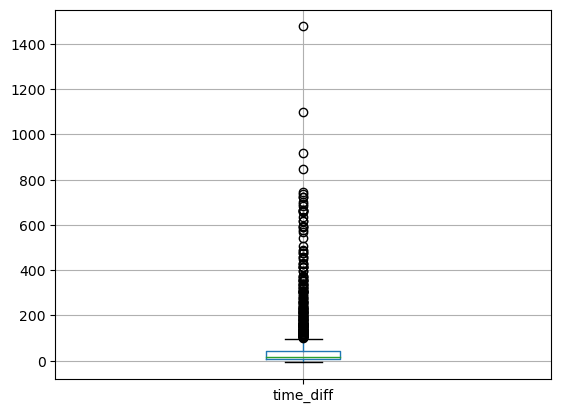

In [44]:
df_ttid_1.boxplot('time_diff')

In [45]:
Q1 = df_ttid_1['time_diff'].quantile(0.25)
Q2 = df_ttid_1['time_diff'].quantile(0.5)
Q3 = df_ttid_1['time_diff'].quantile(0.75)
IQR = Q3-Q1
LL= Q1 -1.5*IQR
UL = Q3 + 1.5*IQR
print(f"Q1:{Q1} | Q3:{Q3} | IQR:{IQR}| LL:{LL}| UL:{UL}")

Q1:9.05 | Q3:44.55 | IQR:35.5| LL:-44.2| UL:97.8


In [46]:
outlier_count = df_ttid_1[df_ttid_1['time_diff']>97.8].shape[0]
outlier_perc = (outlier_count *100)/df_ttid_1.shape[0]
print(f"No. of Outliers: {outlier_count} |  % of Outliers:{outlier_perc}")
#13% of data is outlier 
# 13% ppl have booked before 97 hours

No. of Outliers: 219 |  % of Outliers:13.782252989301448


In [47]:
df_ttid_1['booking_nature'] = pd.cut(df_ttid_1['time_diff'],bins=[-8,9,17,45,1500],labels=['Urgent','SameDay','Regular','Advance']) 
#Urgent:min to 25%, Same day:25%-50%,  Regular:50%-75%,  Advance: 75%-max
df_ttid_1.head()

,online_booking,mobile_site_booking,Car_Cancellation,Is_VMID_12,from_area_id_cancellation,city_route_cancellation,month,day_of_week,is_weekend,time_of_day,time_diff,booking_nature
6,0,0,0,1,3,3,1,1,0,1,0.400000,Urgent
17,1,0,0,0,4,3,1,5,1,1,259.716667,Advance
24,0,0,0,0,4,3,1,5,1,1,89.833333,Advance
158,1,0,0,0,4,4,1,4,0,1,21.183333,Regular
216,1,0,0,0,4,3,1,6,1,1,45.966667,Advance


In [48]:
df_ttid_1= df_ttid_1.drop('time_diff',axis=1)
df_ttid_1['booking_nature'] = df_ttid_1['booking_nature'].map({'Urgent':1,'SameDay':2,'Regular':3,'Advance':4})
df_ttid_1.head()

,online_booking,mobile_site_booking,Car_Cancellation,Is_VMID_12,from_area_id_cancellation,city_route_cancellation,month,day_of_week,is_weekend,time_of_day,booking_nature
6,0,0,0,1,3,3,1,1,0,1,1
17,1,0,0,0,4,3,1,5,1,1,4
24,0,0,0,0,4,3,1,5,1,1,4
158,1,0,0,0,4,4,1,4,0,1,3
216,1,0,0,0,4,3,1,6,1,1,4


# EDA

In [49]:
df_ttid_1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1589 entries, 6 to 43407
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype   
---  ------                     --------------  -----   
 0   online_booking             1589 non-null   int64   
 1   mobile_site_booking        1589 non-null   int64   
 2   Car_Cancellation           1589 non-null   int64   
 3   Is_VMID_12                 1589 non-null   object  
 4   from_area_id_cancellation  1589 non-null   int64   
 5   city_route_cancellation    1589 non-null   int64   
 6   month                      1589 non-null   int32   
 7   day_of_week                1589 non-null   int32   
 8   is_weekend                 1589 non-null   int32   
 9   time_of_day                1519 non-null   category
 10  booking_nature             1589 non-null   category
dtypes: category(2), int32(3), int64(5), object(1)
memory usage: 109.0+ KB


In [50]:
df_ttid_1['booking_nature'] = df_ttid_1['booking_nature'].astype(int)
df_ttid_1['time_of_day'] = pd.to_numeric(df_ttid_1['time_of_day'],errors='coerce')
#df_ttid_1['time_of_day'].astype(int)
#df_ttid_1['time_of_day'] = df_ttid_1['time_of_day'].astype(int)
#
#fillna(df_ttid_1['time_of_day'].median())

In [51]:
df_ttid_1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1589 entries, 6 to 43407
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   online_booking             1589 non-null   int64  
 1   mobile_site_booking        1589 non-null   int64  
 2   Car_Cancellation           1589 non-null   int64  
 3   Is_VMID_12                 1589 non-null   object 
 4   from_area_id_cancellation  1589 non-null   int64  
 5   city_route_cancellation    1589 non-null   int64  
 6   month                      1589 non-null   int32  
 7   day_of_week                1589 non-null   int32  
 8   is_weekend                 1589 non-null   int32  
 9   time_of_day                1519 non-null   float64
 10  booking_nature             1589 non-null   int32  
dtypes: float64(1), int32(4), int64(5), object(1)
memory usage: 124.1+ KB


In [52]:
df_ttid_1['time_of_day'] = pd.to_numeric(df_ttid_1['time_of_day'],errors='coerce')

In [53]:
df_ttid_1['time_of_day'] = df_ttid_1['time_of_day'].fillna(df_ttid_1['time_of_day'].median())

In [54]:
df_ttid_1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1589 entries, 6 to 43407
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   online_booking             1589 non-null   int64  
 1   mobile_site_booking        1589 non-null   int64  
 2   Car_Cancellation           1589 non-null   int64  
 3   Is_VMID_12                 1589 non-null   object 
 4   from_area_id_cancellation  1589 non-null   int64  
 5   city_route_cancellation    1589 non-null   int64  
 6   month                      1589 non-null   int32  
 7   day_of_week                1589 non-null   int32  
 8   is_weekend                 1589 non-null   int32  
 9   time_of_day                1589 non-null   float64
 10  booking_nature             1589 non-null   int32  
dtypes: float64(1), int32(4), int64(5), object(1)
memory usage: 124.1+ KB


In [57]:
df_ttid_1['time_of_day'] = df_ttid_1['time_of_day'].astype('int')
df_ttid_1['booking_nature'] = df_ttid_1['booking_nature'].astype('int')
df_ttid_1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1589 entries, 6 to 43407
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   online_booking             1589 non-null   int64 
 1   mobile_site_booking        1589 non-null   int64 
 2   Car_Cancellation           1589 non-null   int64 
 3   Is_VMID_12                 1589 non-null   object
 4   from_area_id_cancellation  1589 non-null   int64 
 5   city_route_cancellation    1589 non-null   int64 
 6   month                      1589 non-null   int32 
 7   day_of_week                1589 non-null   int32 
 8   is_weekend                 1589 non-null   int32 
 9   time_of_day                1589 non-null   int32 
 10  booking_nature             1589 non-null   int32 
dtypes: int32(5), int64(5), object(1)
memory usage: 117.9+ KB


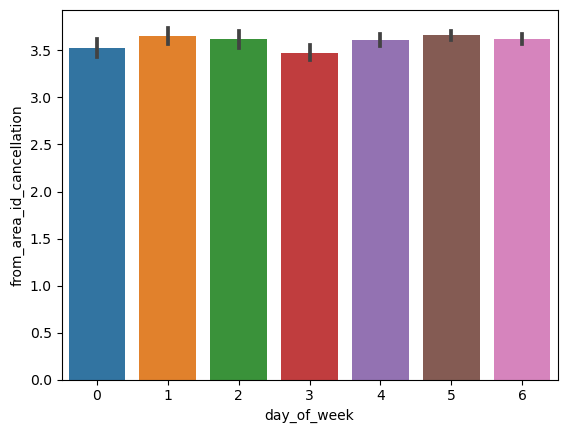

In [58]:
sns.barplot(y='from_area_id_cancellation',x='day_of_week',data=df_ttid_1)
plt.show()

<Axes: xlabel='is_weekend', ylabel='count'>

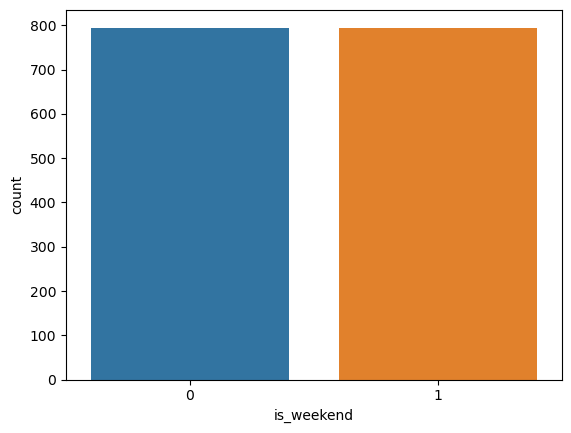

In [59]:
sns.countplot(x='is_weekend',data=df_ttid_1)
#The bookings made on weekdays and weekends are same

<Axes: xlabel='is_weekend', ylabel='count'>

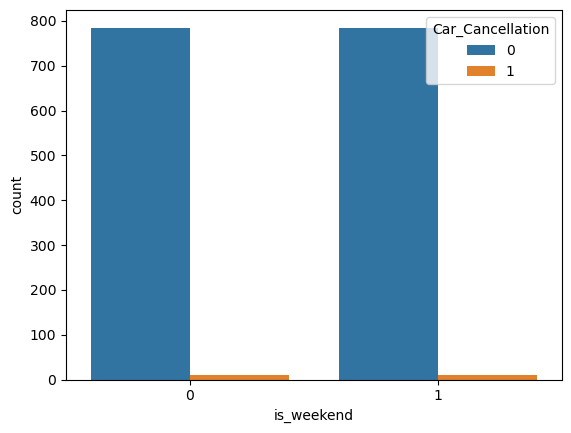

In [60]:
sns.countplot(hue='Car_Cancellation',x='is_weekend',data=df_ttid_1)
#The cancellation is also same across weekdays and weekends

<Axes: xlabel='day_of_week', ylabel='count'>

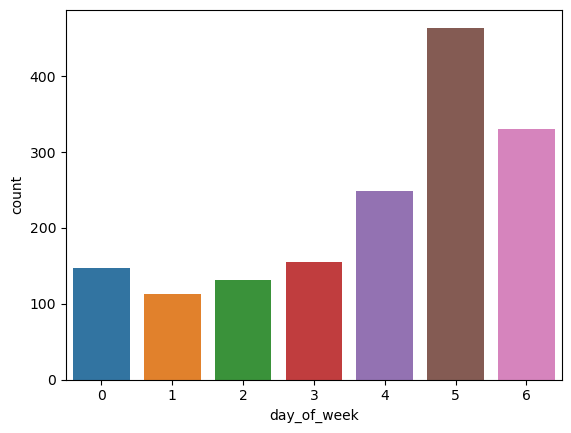

In [61]:
sns.countplot(x='day_of_week',data=df_ttid_1)

<Axes: xlabel='day_of_week', ylabel='count'>

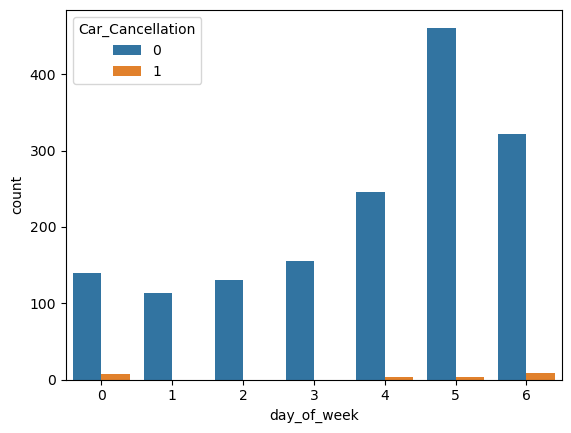

In [62]:
sns.countplot(x='day_of_week',data=df_ttid_1,hue='Car_Cancellation')
#No cab for travel_type= 1 is getting cancelled

<Axes: xlabel='day_of_week', ylabel='count'>

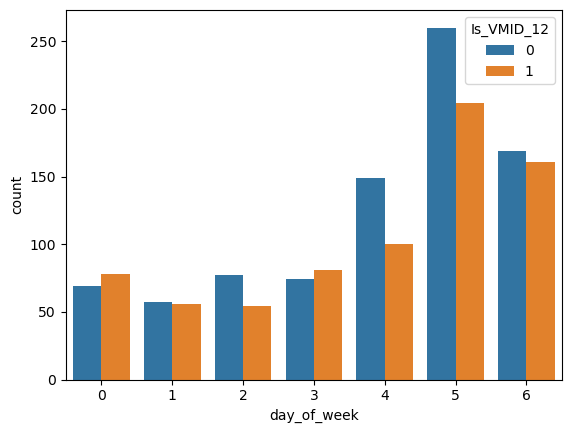

In [63]:
sns.countplot(x='day_of_week',data=df_ttid_1,hue='Is_VMID_12')

<Axes: xlabel='day_of_week', ylabel='count'>

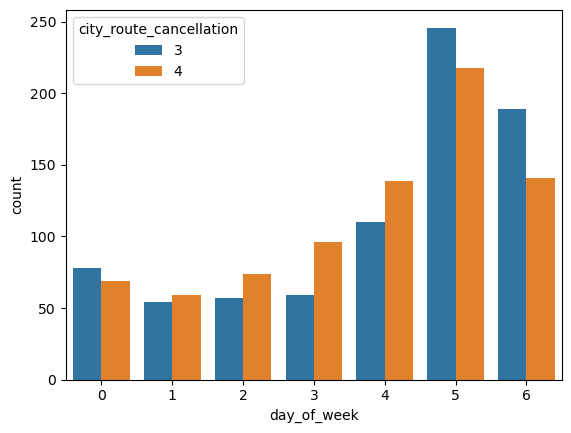

In [64]:
sns.countplot(x='day_of_week',data=df_ttid_1,hue='city_route_cancellation')

<Axes: xlabel='day_of_week', ylabel='count'>

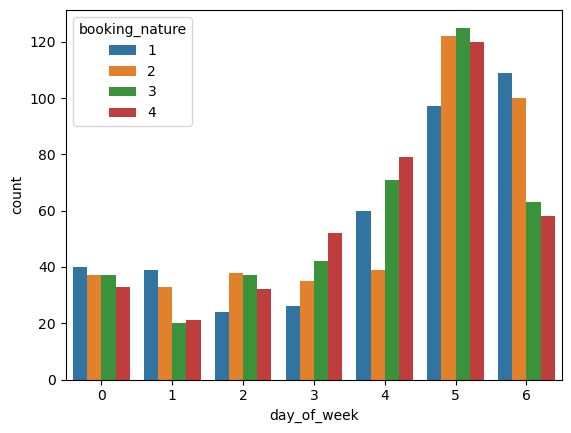

In [65]:
sns.countplot(x='day_of_week',data=df_ttid_1,hue='booking_nature')

<Axes: xlabel='day_of_week', ylabel='count'>

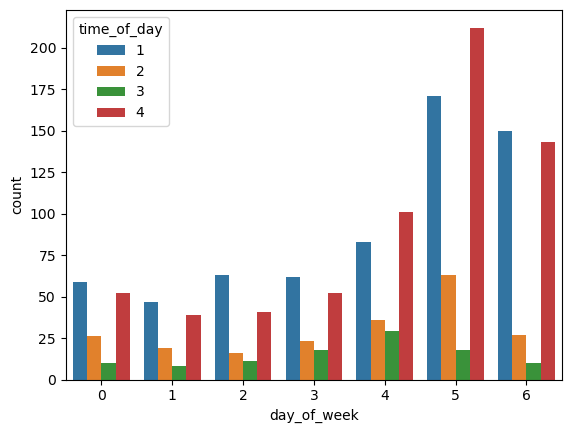

In [66]:
sns.countplot(x='day_of_week',data=df_ttid_1,hue='time_of_day')

<Axes: xlabel='month', ylabel='count'>

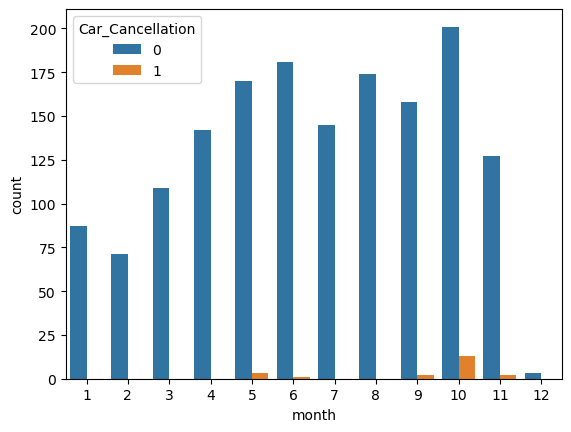

In [67]:
sns.countplot(x='month',hue='Car_Cancellation',data=df_ttid_1)

# Machine Learning

In [68]:
#Split into features and target
X=df_ttid_1.drop('Car_Cancellation',axis=1)
X.head()

,online_booking,mobile_site_booking,Is_VMID_12,from_area_id_cancellation,city_route_cancellation,month,day_of_week,is_weekend,time_of_day,booking_nature
6,0,0,1,3,3,1,1,0,1,1
17,1,0,0,4,3,1,5,1,1,4
24,0,0,0,4,3,1,5,1,1,4
158,1,0,0,4,4,1,4,0,1,3
216,1,0,0,4,3,1,6,1,1,4


In [69]:
Y=df_ttid_1['Car_Cancellation']
Y.head()

6      0
17     0
24     0
158    0
216    0
Name: Car_Cancellation, dtype: int64

In [70]:
from sklearn.model_selection import train_test_split

In [71]:
xtrain,xtest,ytrain,ytest = train_test_split(X,Y,test_size=0.2,random_state=42)

In [72]:
xtrain.head()

,online_booking,mobile_site_booking,Is_VMID_12,from_area_id_cancellation,city_route_cancellation,month,day_of_week,is_weekend,time_of_day,booking_nature
33356,1,0,0,3,3,9,4,0,1,4
19051,1,0,0,3,4,6,4,0,1,3
41574,1,0,1,3,4,11,6,1,4,3
13949,1,0,0,3,4,5,5,1,1,3
27517,0,0,1,3,3,8,1,0,4,2


In [73]:
ytrain.head()

33356    0
19051    0
41574    0
13949    0
27517    0
Name: Car_Cancellation, dtype: int64

In [74]:
xtest.head()

,online_booking,mobile_site_booking,Is_VMID_12,from_area_id_cancellation,city_route_cancellation,month,day_of_week,is_weekend,time_of_day,booking_nature
30407,0,0,0,4,4,9,0,0,4,4
11409,0,0,0,3,4,4,6,1,1,1
40927,0,1,1,4,4,11,6,1,4,2
8100,0,0,0,4,3,3,4,0,4,3
16883,0,0,1,4,4,6,3,0,4,3


In [75]:
ytest.head()

30407    0
11409    0
40927    0
8100     0
16883    0
Name: Car_Cancellation, dtype: int64

## Decision Tree

In [76]:
from sklearn.tree import DecisionTreeClassifier

In [77]:
dt_model = DecisionTreeClassifier()

In [78]:
dt_model.fit(xtrain,ytrain)

DecisionTreeClassifier()

In [79]:
dt_model.score(xtrain,ytrain) #accuracy of 99.8%

0.998426435877262

In [80]:
dt_model.score(xtest,ytest)

0.9937106918238994

In [81]:
ypred = dt_model.predict(xtest)
ytrainpred = dt_model.predict(xtrain)

In [82]:
from sklearn import metrics

In [83]:
print(metrics.classification_report(ytest,ypred))

              precision    recall  f1-score   support

           0       0.99      1.00      1.00       315
           1       1.00      0.33      0.50         3

    accuracy                           0.99       318
   macro avg       1.00      0.67      0.75       318
weighted avg       0.99      0.99      0.99       318



In [84]:
print(metrics.classification_report(ytrain,ytrainpred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1253
           1       1.00      0.89      0.94        18

    accuracy                           1.00      1271
   macro avg       1.00      0.94      0.97      1271
weighted avg       1.00      1.00      1.00      1271



## Naive Bayes Classifier

In [85]:
from sklearn.naive_bayes import GaussianNB

In [86]:
nb_model = GaussianNB()

In [87]:
nb_model.fit(xtrain,ytrain)

GaussianNB()

In [88]:
ypred = nb_model.predict(xtest)
ytrainpred = nb_model.predict(xtrain)

In [89]:
print(metrics.classification_report(ytest,ypred))

              precision    recall  f1-score   support

           0       1.00      0.82      0.90       315
           1       0.03      0.67      0.06         3

    accuracy                           0.82       318
   macro avg       0.52      0.74      0.48       318
weighted avg       0.99      0.82      0.89       318



In [90]:
print(metrics.classification_report(ytrain,ytrainpred))

              precision    recall  f1-score   support

           0       1.00      0.80      0.89      1253
           1       0.07      1.00      0.12        18

    accuracy                           0.80      1271
   macro avg       0.53      0.90      0.51      1271
weighted avg       0.99      0.80      0.88      1271



## Random Forest

In [91]:
from sklearn.ensemble import RandomForestClassifier

In [92]:
rf_model = RandomForestClassifier()

In [93]:
rf_model.fit(xtrain,ytrain)

RandomForestClassifier()

In [94]:
ypred = rf_model.predict(xtest)
ytrainpred = rf_model.predict(xtrain)

In [95]:
print(metrics.classification_report(ytest,ypred))

              precision    recall  f1-score   support

           0       0.99      1.00      1.00       315
           1       1.00      0.33      0.50         3

    accuracy                           0.99       318
   macro avg       1.00      0.67      0.75       318
weighted avg       0.99      0.99      0.99       318



In [96]:
print(metrics.classification_report(ytrain,ytrainpred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1253
           1       0.94      0.94      0.94        18

    accuracy                           1.00      1271
   macro avg       0.97      0.97      0.97      1271
weighted avg       1.00      1.00      1.00      1271

